### Exercise 1.2

#### 2.1 Choosing the series

So i think i will go with Breaking Bad with Better Call Saul i saw both series and i think they have many word in common rather than 2 other choices, as both they have some similar faces 

#### 2.2 Load the data and pre-process the texts

In [58]:
import numpy as np
import pandas  as pd
from pandas import Panel
from tqdm.auto import tqdm
from collections import Counter
tqdm.pandas()
import spacy
from nltk.tokenize import RegexpTokenizer
nlp = spacy.load("en_core_web_sm")
from matplotlib_venn_wordcloud import venn2_wordcloud
from scipy.stats import chi2_contingency

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [9]:
df = pd.read_pickle("discussions.p") # We load the data
df.head()

,title,type,year,post
0,Better Call Saul,linear,2017,Walter. And there the chain ends.
1,Better Call Saul,linear,2016,I love this show. But it's hard to argue again...
2,Better Call Saul,linear,2017,What am I missing? A lot of reference to ribs...
3,Better Call Saul,linear,2018,"Oh come on Mike, he's a good little boy."
4,Better Call Saul,linear,2017,Look again 👀


In [10]:
df['parsed_posts_no_punctuation'] = df['post'].progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct])

In [11]:
df['parsed_posts_adjectives'] = df['post'].progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])

In [12]:
#if i decide to run this also
#df['parsed_posts_nouns'] = df['post'].progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'NOUN'])

In [13]:
df.head()

,title,type,year,post,parsed_posts_no_punctuation,parsed_posts_adjectives
0,Better Call Saul,linear,2017,Walter. And there the chain ends.,"[Walter, and, there, the, chain, end]",[]
1,Better Call Saul,linear,2016,I love this show. But it's hard to argue again...,"[-PRON-, love, this, show, but, -PRON-, be, ha...","[hard, sooooooooooo, top, boring, different, b..."
2,Better Call Saul,linear,2017,What am I missing? A lot of reference to ribs...,"[what, be, -PRON-, miss, , a, lot, of, refere...",[]
3,Better Call Saul,linear,2018,"Oh come on Mike, he's a good little boy.","[oh, come, on, Mike, -PRON-, be, a, good, litt...","[good, little]"
4,Better Call Saul,linear,2017,Look again 👀,"[look, again, 👀]",[👀]


We will lemmatize and for sure analyze the adjective beacause is the mean how the movie makes you realize the characters and step into their shoes, also nouns in my opinion arent so imforamtive and wont make us understand the movie. I processed them both just in case i change my mind later

In [14]:
Better_Call_Saul_posts = df.loc[df['title'] == 'Better Call Saul']['post']
Better_Call_Saul_posts

0                       Walter. And there the chain ends.
1       I love this show. But it's hard to argue again...
2       What am I missing?  A lot of reference to ribs...
3               Oh come on Mike, he's a good little boy. 
4                                            Look again 👀
                              ...                        
5263    I was hoping for Kim.  Would have settled for ...
5264    The Los Pollos factory. Or are we just assumin...
5265          Still think she got the sexiest feet on Tv!
5266    I had to cheat and look. :-)\nBut I remembered...
5267    It's so fantastic. This show literally makes m...
Name: post, Length: 5268, dtype: object

In [15]:
Breaking_Bad_posts = df.loc[df['title'] == 'Breaking Bad']['post']
Breaking_Bad_posts

9988                       &gt;Mike and his granddaughter.
9989        Cool! Thanks for the update! Much appreciated.
9990     The last thing they need is a wildcard.  Jesse...
9991     I don't think there's any doubt that Walt pois...
9992     Don't you have to also note that you watched i...
                               ...                        
16407                                 Woah! That mustache.
16408    I believe the hug was genuine. Yeah Jesse leav...
16409    How does Gomie not get shot? Seriously.  \nAll...
16410    "Just because you shot jesse james, doesn't ma...
16411                                            [deleted]
Name: post, Length: 6424, dtype: object

In [16]:
BCS_adjs = Better_Call_Saul_posts.progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])

In [17]:
BD_adjs = Breaking_Bad_posts.progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])

In [18]:
All_adjs = df['parsed_posts_adjectives']
All_adjs.head()

0                                                   []
1    [hard, sooooooooooo, top, boring, different, b...
2                                                   []
3                                       [good, little]
4                                                  [👀]
Name: parsed_posts_adjectives, dtype: object

In [19]:
flatten = lambda t: [item for sublist in t for item in sublist]

#### 2.3 Pick a word and compute the LLR

In [20]:
print(Counter(flatten(BCS_adjs)).most_common()[:30])
print(Counter(flatten(BCS_adjs)).most_common()[-3:]) # least common word 

[('good', 321), ('bad', 222), ('other', 189), ('same', 183), ('more', 170), ('first', 166), ('great', 139), ('right', 133), ('much', 118), ('sure', 116), ('last', 114), ('own', 110), ('whole', 107), ('little', 104), ('big', 99), ('well', 87), ('many', 84), ('old', 83), ('real', 81), ('next', 77), ('new', 75), ('true', 72), ('wrong', 72), ('only', 71), ('least', 67), ('different', 62), ('few', 50), ('interesting', 49), ('full', 49), ('hard', 46)]
[('emasculating', 1), ('sketch', 1), ('sexy', 1)]


In [21]:
print(Counter(flatten(BD_adjs)).most_common()[:10])
print(Counter(flatten(BD_adjs)).most_common()[-3:]) # least common word 

[('good', 206), ('bad', 138), ('last', 124), ('first', 107), ('much', 98), ('sure', 97), ('more', 96), ('same', 94), ('next', 86), ('other', 85)]
[('juvenile', 1), ('attractive', 1), ('genuine', 1)]


 so for most common word its obvious is : 'good' so i am going to choose this one and for the least common i am going to pick and the word that it occurs most in the first BCS is : 'bad'

In [22]:
# my lists
BCS_adjs
BD_adjs 

9988                                                    []
9989                                                    []
9990                                          [last, only]
9991                                                    []
9992                                                    []
                               ...                        
16407                                                   []
16408    [genuine, good, manipulative, good, hot, clean...
16409                                               [dead]
16410                                                   []
16411                                                   []
Name: post, Length: 6424, dtype: object

In [23]:
counts_c1 = Counter(flatten(BCS_adjs))
counts_c2 = Counter(flatten(BD_adjs))

In [24]:
# the word that not will differ that much.
freq_c1 = counts_c1['good']
freq_c2 = counts_c2['good']

In [25]:
freq_c1_other = sum(counts_c1.values()) - freq_c1
freq_c2_other = sum(counts_c2.values()) - freq_c2

In [26]:
from scipy.stats import chi2_contingency

llr, p_value,_,_ = chi2_contingency([[freq_c1, freq_c2], 
                  [freq_c1_other, freq_c2_other]],
                  lambda_='log-likelihood') # this specifies using the LL measure
print("Log-likelihood: ", llr)

Log-likelihood:  0.038989912622559686


In [27]:
# the word that occurs most in the first 'bad' lets compute the LLR

In [28]:
counts_c1 = Counter(flatten(BCS_adjs))
counts_c2 = Counter(flatten(BD_adjs))

freq_c1 = counts_c1['bad']
freq_c2 = counts_c2['bad']

freq_c1_other = sum(counts_c1.values()) - freq_c1
freq_c2_other = sum(counts_c2.values()) - freq_c2


In [29]:
from scipy.stats import chi2_contingency

llr, p_value,_,_ = chi2_contingency([[freq_c1, freq_c2], 
                  [freq_c1_other, freq_c2_other]],
                  lambda_='log-likelihood') # this specifies using the LL measure
print("Log-likelihood: ", llr)

Log-likelihood:  0.0018950536542537977


#### 2.4 Get the most distinctive words of the first subset compared to second subset, and vice versa.

In [30]:
flatten_BCS = flatten(BCS_adjs)
flatten_BD = flatten(BD_adjs)

In [31]:
def distinctive_words(target_corpus, reference_corpus):
    counts_c1 = Counter(target_corpus) # don't forget to flatten your texts!
    counts_c2 = Counter(reference_corpus)
    vocabulary = set(list(counts_c1.keys()) + list(counts_c2.keys()))
    freq_c1_total = sum(counts_c1.values()) 
    freq_c2_total = sum(counts_c2.values()) 
    results = []
    for word in vocabulary:
        freq_c1 = counts_c1[word]
        freq_c2 = counts_c2[word]
        freq_c1_other = freq_c1_total - freq_c1
        freq_c2_other = freq_c2_total - freq_c2
        llr, p_value,_,_ = chi2_contingency([[freq_c1, freq_c2], 
                      [freq_c1_other, freq_c2_other]],
                      lambda_='log-likelihood') 
        if freq_c2 / freq_c2_other > freq_c1 / freq_c1_other:
            llr = -llr
        result = {'word':word, 
                    'llr':llr,
                    'p_value': p_value}
        results.append(result)
    results_df = pd.DataFrame(results)
    return results_df



In [32]:
results_df = distinctive_words(flatten_BCS, flatten_BD)
results_df.sort_values('llr', ascending=False).head(5)

,word,llr,p_value
1813,mental,19.300083,0.000011
1116,own,10.518983,0.001182
2075,elderly,9.806704,0.001739
1859,criminal,9.116270,0.002533
101,⢀,8.906269,0.002842


In [33]:
results_df = distinctive_words(flatten_BD, flatten_BCS)
results_df.sort_values('llr', ascending=False).head(5)

,word,llr,p_value
2012,dead,28.213712,1.086322e-07
1838,holy,25.435003,4.575407e-07
258,purple,18.248011,1.939283e-05
1587,last,17.549533,2.799196e-05
891,only,14.964914,1.095289e-04


#### 2.5 Get the most distinctive words of the first subset compared to all the posts that are not in the first subset. 

I will flatter the whole data first

In [34]:
all_posts_excl_BCS = df.loc[df['title'] != 'Better Call Saul']['post']
all_posts_excl_BCS

5268     I think the rabbit ending was the "real" endin...
5269     She was wiped out, didn't seemed to have eaten...
5270                             How does the flair work? 
5271      She took the monkey with her when she drove off.
5272     Nah, i'm just always trying to find connection...
                               ...                        
49995    Anyone else think that the top of the mushroom...
49996    Shit I thought it was mini van lady with shoot...
49997    Did Janey say that Dougie was absent for a nig...
49998    From what I've read and seen they were mutual ...
49999                                      PBR... blech!!!
Name: post, Length: 44732, dtype: object

In [35]:
all_posts_excl_BD = df.loc[df['title'] != 'Breaking Bad']['post']
all_posts_excl_BD

0                        Walter. And there the chain ends.
1        I love this show. But it's hard to argue again...
2        What am I missing?  A lot of reference to ribs...
3                Oh come on Mike, he's a good little boy. 
4                                             Look again 👀
                               ...                        
49995    Anyone else think that the top of the mushroom...
49996    Shit I thought it was mini van lady with shoot...
49997    Did Janey say that Dougie was absent for a nig...
49998    From what I've read and seen they were mutual ...
49999                                      PBR... blech!!!
Name: post, Length: 43576, dtype: object

In [36]:
All_adjs_excl_BCS = all_posts_excl_BCS.progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])

In [37]:
All_adjs_excl_BD = all_posts_excl_BD.progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])

In [38]:
flatten_whole_excl_BCS = flatten(All_adjs_excl_BCS)
flatten_whole_excl_BD = flatten(All_adjs_excl_BD)

In [39]:
top_adj_in_All_excl_BCS_counts = [x[0] for x in flatten_whole_excl_BCS]
top_adj_in_All_excl_BD_counts = [x[0] for x in flatten_whole_excl_BD]

In [40]:
results_df_2 = distinctive_words(flatten_BCS, top_adj_in_All_excl_BCS_counts)
results_df_2.sort_values('llr', ascending=False).head(10)

,word,llr,p_value
1521,good,1367.695579,2.199414e-299
292,bad,941.237203,1.065537e-206
538,other,799.540885,6.790174e-176
20,same,773.803277,2.678050e-170
66,more,718.065802,3.525718e-158
44,first,700.923425,1.883213e-154
1484,great,585.308794,2.626146e-129
1683,right,559.640141,1.006701e-123
458,much,495.507739,9.024110e-110
1140,sure,486.961114,6.531957e-108


In [41]:
#2.6 

results_df_3 = distinctive_words(flatten_BD, top_adj_in_All_excl_BD_counts)
results_df_3.sort_values('llr', ascending=False).head(10)

,word,llr,p_value
1095,good,1066.225540,7.238938e-234
211,bad,710.026380,1.974348e-156
915,last,636.900030,1.578123e-140
30,first,548.205420,3.093038e-121
321,much,501.296519,4.964491e-111
818,sure,496.086503,6.752659e-110
45,more,490.876912,9.183461e-109
13,same,480.459011,1.697712e-106
812,next,438.804853,1.970412e-97
376,other,433.600091,2.675076e-96


#### 2.7 

In [42]:
All_post_excl_BCS_BD = df[(df['title'] != 'Better Call Saul') & (df['title'] != 'Breaking Bad')]['post']
All_post_excl_BCS_BD.head(10)

5268    I think the rabbit ending was the "real" endin...
5269    She was wiped out, didn't seemed to have eaten...
5270                            How does the flair work? 
5271     She took the monkey with her when she drove off.
5272    Nah, i'm just always trying to find connection...
5273    You guys should checkout The Stanley Parable g...
5274                 For me it was about money and stuff.
5275    "But guize! Teh wymynz power!"\n\nSJW "reasoning"
5276    The DNA is physical. The data from the thing o...
5277    What about her need to kill the dog when it wa...
Name: post, dtype: object

In [43]:
All_adjs_excl_BCS_BD = All_post_excl_BCS_BD.progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])


In [44]:
flatten_whole_excl_BCS_BD = flatten(All_adjs_excl_BCS_BD)
top_adj_in_All_excl_BCS_BD_counts = [x[0] for x in flatten_whole_excl_BCS_BD]

In [45]:
distinctive_words_BCS_vs_All_excl_BCS_BD = distinctive_words(flatten_BCS, top_adj_in_All_excl_BCS_BD_counts)
distinctive_words_BD_vs_All_excl_BCS_BD = distinctive_words(flatten_BD, top_adj_in_All_excl_BCS_BD_counts)

In [46]:
distinctive_words_BCS_vs_All_excl_BCS_BD.sort_values('llr', ascending = False).head(10)

,word,llr,p_value
1521,good,1317.868214,1.479887e-288
292,bad,906.826873,3.219192e-199
538,other,770.265117,1.574393e-169
20,same,745.460826,3.893905e-164
66,more,691.745288,1.865352e-152
44,first,675.224976,7.300193e-149
1484,great,563.808432,1.247849e-124
1683,right,539.072485,3.000625e-119
458,much,477.271528,8.384102e-106
1140,sure,469.035728,5.195195e-104


In [47]:
distinctive_words_BD_vs_All_excl_BCS_BD.sort_values('llr', ascending = False).head(10)


,word,llr,p_value
1086,good,1014.167627,1.495395e-222
207,bad,675.213976,7.340514e-149
908,last,605.636216,9.951455e-134
29,first,521.249712,2.262826e-115
317,much,476.621173,1.161380e-105
811,sure,471.664514,1.391745e-104
44,more,466.708277,1.667543e-103
13,same,456.797072,2.392814e-101
805,next,417.169564,1.008159e-92
372,other,412.218117,1.205876e-91


In [48]:
All_post_BCS_BD = df[(df['title'] == 'Better Call Saul') | (df['title'] == 'Breaking Bad')]['post']
All_post_BCS_BD.head(10)

0                    Walter. And there the chain ends.
1    I love this show. But it's hard to argue again...
2    What am I missing?  A lot of reference to ribs...
3            Oh come on Mike, he's a good little boy. 
4                                         Look again 👀
5    I'm watching with my mum and she was like "Kim...
6    Maybe when Jimmy gets the $7 million to ABQ, t...
7    Didn't VG say no other BB characters would be ...
8    I remember spooning (gahhk that word is so bad...
9          How did Gus find out mike knew about Nacho?
Name: post, dtype: object

In [49]:
All_adjs_BCS_BD = All_post_BCS_BD.progress_apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_punct and y.pos_ == 'ADJ'])


In [50]:
flatten_BCS_BD = flatten(All_adjs_BCS_BD)
top_adj_in_All_excl_BCS_BD_counts = [x[0] for x in flatten_BCS_BD]

In [51]:
results_df_4 = distinctive_words(flatten_BCS_BD, top_adj_in_All_excl_BCS_BD_counts)
results_df_4.sort_values('llr', ascending=False).head(10)

,word,llr,p_value
1918,good,731.769174,3.694064e-161
371,bad,495.727019,8.085236e-110
25,same,379.186277,1.871208e-84
681,other,374.984021,1.538288e-83
56,first,373.583429,3.104420e-83
82,more,363.781538,4.228406e-81
1610,last,324.613989,1.431847e-72
581,much,293.885718,7.078034e-66
1437,sure,289.698753,5.783564e-65
2115,right,281.327217,3.858114e-63


In [81]:
results_df_2['type'] = 'Better Call Saul' # 2.5
results_df_3['type'] = 'Breaking Bad' # 2.6
results_df_4['type'] = 'Both' # 2.7
results_all = pd.concat([results_df_2, results_df_3, results_df_4])


In [82]:
print(results_all[results_all.type=='Both'])

               word        llr   p_value  type
0     indispensable   0.000000  1.000000  Both
1               wet   0.523281  0.469446  Both
2           lovable   1.455646  0.227624  Both
3         everytime   0.000000  1.000000  Both
4           loooong   0.000000  1.000000  Both
...             ...        ...       ...   ...
2173    untouchable   0.000000  1.000000  Both
2174    unfortunate   2.531309  0.111608  Both
2175        skilled   0.000000  1.000000  Both
2176      fantastic  16.416448  0.000051  Both
2177          fishy   0.523281  0.469446  Both

[2178 rows x 4 columns]


In [83]:
results_all = results_all.sort_values('llr', ascending = False).drop_duplicates(['word'])

In [84]:
print(results_all[results_all.type=='Both'])

     word       llr   p_value  type
251     \ -0.000000  1.000000  Both
1687    C -0.000000  1.000000  Both
2087    4 -0.523281  0.469446  Both
338     2 -1.455646  0.227624  Both
1267    3 -1.455646  0.227624  Both


In [75]:
# for our venn diagram we'll use 
# 1) a set incl distinctive words for the 1st subset + the most distinctive for both subsets
# 2) a set the most distinctive words for the second subset + the most distinctive for both subsets
first_set = np.concatenate([results_all[results_all.type=='Both']['word'][:20].values, results_all[results_all.type=='Breaking Bad']['word'][:20].values]).tolist()
first_string = ' '.join(first_set)
second_set = np.concatenate([results_all[results_all.type=='Both']['word'][:20].values, results_all[results_all.type=='Better Call Saul']['word'][:20].values]).tolist()
second_string = ' '.join(second_set)

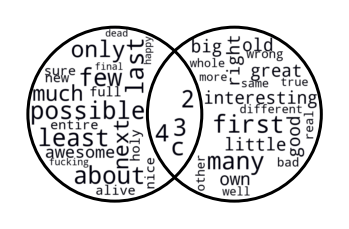

In [76]:
sets = []
for string in [first_string, second_string]:
    # get a word list
    words = string.split(' ')
    # remove non alphanumeric characters
    words = [''.join(ch for ch in word if ch.isalnum()) for word in words]
    # convert to all lower case
    words = [word.lower() for word in words]
    sets.append(set(words))
venn2_wordcloud(sets)